In [1]:
library(pacman)
p_load(lubridate, AUC, tidyverse,magrittr, dplyr, tidyr,rlist,dummy , e1071, ROSE , rotationForest, xgboost, Boruta, varSelRF)

also installing the dependency 'jsonlite'

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.6:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.6/PACKAGES'"


  There is a binary version available but the source version is later:
         binary source needs_compilation
jsonlite  1.7.2  1.8.0              TRUE

  Binaries will be installed
package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\jordy\anaconda3\envs\R2\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll to C:\Users\jordy\anaconda3\envs\R2\Lib\R\library\jsonlite\libs\x64\jsonlite.dll: Permission denied"Warning message:
"restored 'jsonlite'"

package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jordy\AppData\Local\Temp\Rtmpwj34Gh\downloaded_packages



tidyverse installed
Warning message:
"package 'tidyverse' was built under R version 3.6.3"Warning message in p_load(lubridate, AUC, tidyverse, magrittr, dplyr, tidyr, rlist, :
"Failed to install/load:
tidyverse"

In [2]:
p_load(caret)

p_load(FNN)

p_load(randomForest)

options(repr.matrix.max.cols=1000, repr.matrix.max.rows=1000)

In [3]:
p_load(ranger)

In [4]:
p_load(ada)
p_load(remotes)

# Building basetable

In [5]:
table = (read.csv("Data//Flat_races_final.csv", sep = ";"))
head(table)

Pos,Rider,Team,Time,Rider_ID,Rider_Country,Team_ID,Year,Stage,UCI,ID,Family.Name,Given.Name,Name,Region,Birthday,Popularity,Size,Weight,FLAT,MOUNTAIN,DOWNHILL,COBBLES,TT,PROLOGUE,SPRINT,ACCELERATION,ENDURANCE,RESISTANCE,RECUP,HILL,ATTACK,Stage.Type,Race,gene_sz_firstlastname,gene_f_popularity_max,value_i_rank_voted,value_i_potentiel,fkIDrace,fkIDcyclist_state,fkIDtype_rider,fkIDinjury,fkIDtga_skin,prerace_i_cyclist,race_b_withdrawal,fkIDstaff_physician,fkIDstaff_trainer,limit_i_plain,limit_i_mountain,limit_i_downhilling,limit_i_cobble,limit_i_timetrial,limit_i_prologue,limit_i_sprint,limit_i_acceleration,limit_i_endurance,limit_i_resistance,limit_i_recuperation,limit_i_hill,limit_i_baroudeur,fitness_i_handicap,gene_b_selected_in_roster,gene_b_will_retire,fkIDtraining_camp,gene_i_dossard,gene_i_champion_bit,gene_b_nominated,CONSTANT,gene_sz_soundname,fkIDstate_roster,gene_b_inshortlist,gene_i_date_last_breakaway,gene_i_date_last_punchers,gene_ilist_fkIDfavorite_races,gene_i_year_progression,gene_i_day_progression
1,cavendish mark,Sky ProCycling,04:53:12,14,GBR,44,2012,2,NA,1008,Cavendish,Mark,M.Cavendish,1801,19850521,82,175,69,78,57,70,67,63,73,83,83,76,75,76,66,59,Flat,Giro,M.Cavendish,0,0,7,0,3,0,0,114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-128,0,,Cavendish,0,0,0,0,25|77|175,0,0
2,goss matthew,Orica - GreenEDGE,+ 00,512,AUS,6,2012,2,NA,289,Goss,Matthew Harley,M.Goss,2001,19861105,46,177,70,75,61,69,69,66,67,78,78,74,73,70,73,67,Flat,Giro,M.Goss,0,0,6,0,3,0,0,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,,0,0,0,0,,0,0
3,soupe geoffrey,FDJ - BigMat,+ 00,2326,FRA,9,2012,2,NA,2252,Soupe,Geoffrey,G.Soupe,322,19880322,9,177,68,67,55,64,58,65,65,65,67,65,65,62,63,68,Flat,Giro,G.Soupe,0,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,,0,0,0,0,,0,0
4,farrar tyler,Garmin - Sharp,+ 00,53,USA,10,2012,2,NA,423,Farrar,Tyler,T.Farrar,601,19840602,70,183,74,77,58,71,72,70,78,82,79,75,72,75,67,62,Flat,Giro,T.Farrar,0,0,6,0,3,0,0,98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,,0,0,0,0,25|13|135,0,0
5,ferrari roberto,Androni Giocattoli - Venezuela,+ 00,2144,ITA,23,2012,2,NA,1075,Ferrari,Roberto,R.Ferrari,204,19830309,26,173,70,70,60,67,58,61,63,75,73,67,67,65,66,63,Flat,Giro,R.Ferrari,0,0,5,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,,0,0,0,0,,0,0
6,renshaw mark,Rabobank,+ 00,97,AUS,14,2012,2,NA,1872,Renshaw,Mark,M.Renshaw,2001,19821022,49,179,73,75,54,64,62,65,71,77,78,67,68,70,65,56,Flat,Giro,M.Renshaw,0,0,5,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,,0,0,0,0,,0,0


In [6]:
table_train = table[table$Year<=2016,]

In [7]:
table_val = table[(table$Year>2016)&(table$Year<2019) ,]

In [8]:
table_trainandval = table[table$Year<2019,]

In [9]:
table_test = table[table$Year>=2019,]

In [10]:
basetable_train = table_train %>% group_by(Race, Year,Team) %>% summarise(flat_mean = round(mean(FLAT))
                                             , mountain_mean = round(mean(MOUNTAIN))
                                            , downhill_mean = round(mean(DOWNHILL))
                                            ,cobbles_mean = round(mean(COBBLES))
                                            ,tt_mean = round(mean(TT)),
                                            ,prologue_mean = round(mean(PROLOGUE))
                                            ,sprint_mean = round(mean(SPRINT))
                                            ,acceleration_mean = round(mean(ACCELERATION))
                                            ,endurance_mean = round(mean(ENDURANCE))
                                            ,resistance_mean = round(mean(RESISTANCE))
                                            ,recup_mean = round(mean(RECUP))
                                            ,hill_mean = round(mean(HILL))
                                            ,attack_mean = round(mean(ATTACK))
                                            
                                            ,flat_max = round(max(FLAT))
                                            ,mountain_max = round(max(MOUNTAIN))
                                            ,downhill_max = round(max(DOWNHILL))
                                            ,cobbles_max = round(max(COBBLES))
                                            ,tt_max = round(max(TT)),
                                            ,prologue_max = round(max(PROLOGUE))
                                            ,sprint_max = round(max(SPRINT))
                                            ,acceleration_max = round(max(ACCELERATION))
                                            ,endurance_max = round(max(ENDURANCE))
                                            ,resistance_max = round(max(RESISTANCE))
                                            ,recup_max = round(max(RECUP))
                                            ,hill_max = round(max(HILL))
                                            ,attack_max = round(max(ATTACK))
                                            
                                            ,flat_min = round(min(FLAT))
                                            ,mountain_min = round(min(MOUNTAIN))
                                            ,downhill_min = round(min(DOWNHILL))
                                            ,cobbles_min = round(min(COBBLES))
                                            ,tt_min = round(min(TT)),
                                            ,prologue_min = round(min(PROLOGUE))
                                            ,sprint_min = round(min(SPRINT))
                                            ,acceleration_min = round(min(ACCELERATION))
                                            ,endurance_min = round(min(ENDURANCE))
                                            ,resistance_min = round(min(RESISTANCE))
                                            ,recup_min = round(min(RECUP))
                                            ,hill_min = round(min(HILL))
                                            ,attack_min = round(min(ATTACK))
                                    
                                            ,best_position = min(Pos))

`summarise()` has grouped output by 'Race', 'Year'. You can override using the `.groups` argument.


In [11]:
basetable_val = table_val %>% group_by(Race, Year,Team) %>% summarise(flat_mean = round(mean(FLAT))
                                             , mountain_mean = round(mean(MOUNTAIN))
                                            , downhill_mean = round(mean(DOWNHILL))
                                            ,cobbles_mean = round(mean(COBBLES))
                                            ,tt_mean = round(mean(TT)),
                                            ,prologue_mean = round(mean(PROLOGUE))
                                            ,sprint_mean = round(mean(SPRINT))
                                            ,acceleration_mean = round(mean(ACCELERATION))
                                            ,endurance_mean = round(mean(ENDURANCE))
                                            ,resistance_mean = round(mean(RESISTANCE))
                                            ,recup_mean = round(mean(RECUP))
                                            ,hill_mean = round(mean(HILL))
                                            ,attack_mean = round(mean(ATTACK))
                                            
                                            ,flat_max = round(max(FLAT))
                                            ,mountain_max = round(max(MOUNTAIN))
                                            ,downhill_max = round(max(DOWNHILL))
                                            ,cobbles_max = round(max(COBBLES))
                                            ,tt_max = round(max(TT)),
                                            ,prologue_max = round(max(PROLOGUE))
                                            ,sprint_max = round(max(SPRINT))
                                            ,acceleration_max = round(max(ACCELERATION))
                                            ,endurance_max = round(max(ENDURANCE))
                                            ,resistance_max = round(max(RESISTANCE))
                                            ,recup_max = round(max(RECUP))
                                            ,hill_max = round(max(HILL))
                                            ,attack_max = round(max(ATTACK))
                                            
                                            ,flat_min = round(min(FLAT))
                                            ,mountain_min = round(min(MOUNTAIN))
                                            ,downhill_min = round(min(DOWNHILL))
                                            ,cobbles_min = round(min(COBBLES))
                                            ,tt_min = round(min(TT)),
                                            ,prologue_min = round(min(PROLOGUE))
                                            ,sprint_min = round(min(SPRINT))
                                            ,acceleration_min = round(min(ACCELERATION))
                                            ,endurance_min = round(min(ENDURANCE))
                                            ,resistance_min = round(min(RESISTANCE))
                                            ,recup_min = round(min(RECUP))
                                            ,hill_min = round(min(HILL))
                                            ,attack_min = round(min(ATTACK))
                                    
                                            ,best_position = min(Pos))

`summarise()` has grouped output by 'Race', 'Year'. You can override using the `.groups` argument.


In [12]:
basetable_test = table_test %>% group_by(Race, Year,Team) %>% summarise(flat_mean = round(mean(FLAT))
                                             , mountain_mean = round(mean(MOUNTAIN))
                                            , downhill_mean = round(mean(DOWNHILL))
                                            ,cobbles_mean = round(mean(COBBLES))
                                            ,tt_mean = round(mean(TT)),
                                            ,prologue_mean = round(mean(PROLOGUE))
                                            ,sprint_mean = round(mean(SPRINT))
                                            ,acceleration_mean = round(mean(ACCELERATION))
                                            ,endurance_mean = round(mean(ENDURANCE))
                                            ,resistance_mean = round(mean(RESISTANCE))
                                            ,recup_mean = round(mean(RECUP))
                                            ,hill_mean = round(mean(HILL))
                                            ,attack_mean = round(mean(ATTACK))
                                            
                                            ,flat_max = round(max(FLAT))
                                            ,mountain_max = round(max(MOUNTAIN))
                                            ,downhill_max = round(max(DOWNHILL))
                                            ,cobbles_max = round(max(COBBLES))
                                            ,tt_max = round(max(TT)),
                                            ,prologue_max = round(max(PROLOGUE))
                                            ,sprint_max = round(max(SPRINT))
                                            ,acceleration_max = round(max(ACCELERATION))
                                            ,endurance_max = round(max(ENDURANCE))
                                            ,resistance_max = round(max(RESISTANCE))
                                            ,recup_max = round(max(RECUP))
                                            ,hill_max = round(max(HILL))
                                            ,attack_max = round(max(ATTACK))
                                            
                                            ,flat_min = round(min(FLAT))
                                            ,mountain_min = round(min(MOUNTAIN))
                                            ,downhill_min = round(min(DOWNHILL))
                                            ,cobbles_min = round(min(COBBLES))
                                            ,tt_min = round(min(TT)),
                                            ,prologue_min = round(min(PROLOGUE))
                                            ,sprint_min = round(min(SPRINT))
                                            ,acceleration_min = round(min(ACCELERATION))
                                            ,endurance_min = round(min(ENDURANCE))
                                            ,resistance_min = round(min(RESISTANCE))
                                            ,recup_min = round(min(RECUP))
                                            ,hill_min = round(min(HILL))
                                            ,attack_min = round(min(ATTACK))
                                    
                                            ,best_position = min(Pos))

`summarise()` has grouped output by 'Race', 'Year'. You can override using the `.groups` argument.


In [13]:
basetable = table_trainandval %>% group_by(Race, Year,Team) %>% summarise(flat_mean = round(mean(FLAT))
                                             , mountain_mean = round(mean(MOUNTAIN))
                                            , downhill_mean = round(mean(DOWNHILL))
                                            ,cobbles_mean = round(mean(COBBLES))
                                            ,tt_mean = round(mean(TT)),
                                            ,prologue_mean = round(mean(PROLOGUE))
                                            ,sprint_mean = round(mean(SPRINT))
                                            ,acceleration_mean = round(mean(ACCELERATION))
                                            ,endurance_mean = round(mean(ENDURANCE))
                                            ,resistance_mean = round(mean(RESISTANCE))
                                            ,recup_mean = round(mean(RECUP))
                                            ,hill_mean = round(mean(HILL))
                                            ,attack_mean = round(mean(ATTACK))
                                            
                                            ,flat_max = round(max(FLAT))
                                            ,mountain_max = round(max(MOUNTAIN))
                                            ,downhill_max = round(max(DOWNHILL))
                                            ,cobbles_max = round(max(COBBLES))
                                            ,tt_max = round(max(TT)),
                                            ,prologue_max = round(max(PROLOGUE))
                                            ,sprint_max = round(max(SPRINT))
                                            ,acceleration_max = round(max(ACCELERATION))
                                            ,endurance_max = round(max(ENDURANCE))
                                            ,resistance_max = round(max(RESISTANCE))
                                            ,recup_max = round(max(RECUP))
                                            ,hill_max = round(max(HILL))
                                            ,attack_max = round(max(ATTACK))
                                            
                                            ,flat_min = round(min(FLAT))
                                            ,mountain_min = round(min(MOUNTAIN))
                                            ,downhill_min = round(min(DOWNHILL))
                                            ,cobbles_min = round(min(COBBLES))
                                            ,tt_min = round(min(TT)),
                                            ,prologue_min = round(min(PROLOGUE))
                                            ,sprint_min = round(min(SPRINT))
                                            ,acceleration_min = round(min(ACCELERATION))
                                            ,endurance_min = round(min(ENDURANCE))
                                            ,resistance_min = round(min(RESISTANCE))
                                            ,recup_min = round(min(RECUP))
                                            ,hill_min = round(min(HILL))
                                            ,attack_min = round(min(ATTACK))
                                    
                                            ,best_position = min(Pos))

`summarise()` has grouped output by 'Race', 'Year'. You can override using the `.groups` argument.


In [14]:
basetable_train = (basetable_train)%>% drop_na()
basetable_val = (basetable_val)%>% drop_na()
basetable_test = (basetable_test)%>% drop_na()
basetable = (basetable)%>% drop_na()

In [15]:
#Training set
basetable_train$Top10 = as.factor(ifelse(basetable_train$best_position <=10, 1,0))
basetable_train$Top5 = as.factor(ifelse(basetable_train$best_position <=5, 1,0))
basetable_train$Top4 = as.factor(ifelse(basetable_train$best_position <=4, 1,0))
basetable_train$Top3 = as.factor(ifelse(basetable_train$best_position <=3, 1,0))
basetable_train$Top2 = as.factor(ifelse(basetable_train$best_position <=2, 1,0))

In [16]:
table(basetable_train$Top5)


  0   1 
 85 110 

In [17]:
basetable_train$minutes_from_top = NULL
basetable_train$best_position = NULL
basetable_train$Team = NULL
basetable_train$Year = NULL
basetable_train$Stage = NULL
basetable_train$Team_ID = NULL
basetable_train$Race= NULL

In [18]:
#Validation set
basetable_val$Top10 = as.factor(ifelse(basetable_val$best_position <=10, 1,0))
basetable_val$Top5 = as.factor(ifelse(basetable_val$best_position <=5, 1,0))
basetable_val$Top4 = as.factor(ifelse(basetable_val$best_position <=4, 1,0))
basetable_val$Top3 = as.factor(ifelse(basetable_val$best_position <=3, 1,0))
basetable_val$Top2 = as.factor(ifelse(basetable_val$best_position <=2, 1,0))

In [19]:
table(basetable_val$Top10)


 0  1 
33 76 

In [20]:

basetable_val$minutes_from_top = NULL
basetable_val$best_position = NULL
basetable_val$Team = NULL
basetable_val$Year = NULL
basetable_val$Stage = NULL
basetable_val$Team_ID = NULL
basetable_val$Race= NULL

In [21]:
#Test set
basetable_test$Top10 = as.factor(ifelse(basetable_test$best_position <=10, 1,0))
basetable_test$Top5 = as.factor(ifelse(basetable_test$best_position <=5, 1,0))
basetable_test$Top4 = as.factor(ifelse(basetable_test$best_position <=4, 1,0))
basetable_test$Top3 = as.factor(ifelse(basetable_test$best_position <=3, 1,0))
basetable_test$Top2 = as.factor(ifelse(basetable_test$best_position <=2, 1,0))

In [22]:
table(basetable_test$Top5)


 0  1 
84 75 

In [23]:
basetable_test$minutes_from_top = NULL
basetable_test$best_position = NULL
basetable_test$Team = NULL
basetable_test$Year = NULL
basetable_test$Stage = NULL
basetable_test$Team_ID = NULL
basetable_test$Race= NULL

In [24]:
basetable$Top10 = as.factor(ifelse(basetable$best_position <=10, 1,0))
basetable$Top5 = as.factor(ifelse(basetable$best_position <=5, 1,0))
basetable$Top4 = as.factor(ifelse(basetable$best_position <=4, 1,0))
basetable$Top3 = as.factor(ifelse(basetable$best_position <=3, 1,0))
basetable$Top2 = as.factor(ifelse(basetable$best_position <=2, 1,0))

In [25]:
table(basetable$Top5)


  0   1 
142 162 

In [26]:
basetable$minutes_from_top = NULL
basetable$best_position = NULL
basetable$Team = NULL
basetable$Year = NULL
basetable$Stage = NULL
basetable$Team_ID = NULL
basetable$Race= NULL

table_train <- basetable_train
table_test<- basetable_test
table_val <- basetable_val
table_trainval = basetable

# Feature Selection

## Variable selection: Boruta & varSelRF

In [53]:
#Preparing the train and validation tables
table_train5 <- table_train
table_val5 <- table_val
table_test5 <- table_test

table_train5$Top10 <- NULL
table_train5$Top4 <- NULL
table_train5$Top3 <- NULL
table_train5$Top2 <- NULL

table_val5$Top10 <- NULL
table_val5$Top4 <- NULL
table_val5$Top3 <- NULL
table_val5$Top2 <- NULL

table_test5$Top10 <- NULL
table_test5$Top4 <- NULL
table_test5$Top3 <- NULL
table_test5$Top2 <- NULL

In [54]:
head(table_train5)

flat_mean,mountain_mean,downhill_mean,cobbles_mean,tt_mean,prologue_mean,sprint_mean,acceleration_mean,endurance_mean,resistance_mean,recup_mean,hill_mean,attack_mean,flat_max,mountain_max,downhill_max,cobbles_max,tt_max,prologue_max,sprint_max,acceleration_max,endurance_max,resistance_max,recup_max,hill_max,attack_max,flat_min,mountain_min,downhill_min,cobbles_min,tt_min,prologue_min,sprint_min,acceleration_min,endurance_min,resistance_min,recup_min,hill_min,attack_min,Top5
67,68,67,57,62,64,64,68,67,67,67,68,68,71,78,78,61,68,69,75,74,72,74,75,75,73,64,58,61,54,58,61,56,61,63,64,63,65,61,1
66,70,67,55,64,64,64,69,67,69,68,70,70,70,79,70,68,68,70,75,75,69,74,72,74,80,64,60,63,51,60,60,56,60,64,64,62,65,63,1
68,70,65,57,67,67,62,68,68,69,69,71,69,74,78,70,68,76,76,72,76,74,76,76,78,72,63,62,62,52,58,61,56,63,65,64,63,67,62,0
70,67,68,61,67,68,64,69,69,69,67,70,72,80,75,81,81,77,79,79,77,77,76,78,75,78,65,59,63,53,58,59,56,62,66,64,62,64,64,0
65,63,64,55,60,61,64,66,65,65,64,67,68,72,75,71,59,63,65,76,77,70,72,71,73,73,63,56,60,53,58,58,58,61,62,61,60,62,63,1
65,68,66,55,61,62,60,64,66,66,66,68,69,69,76,72,57,67,68,67,70,72,73,73,74,82,62,56,62,53,57,58,55,61,62,61,59,62,62,0


In [55]:
#Variable selection: Boruta
rf_boruta <- Boruta(table_train5[, !names(table_train5) %in% c("Top5")], table_train5$Top5, doTrace = 0, maxRuns = 500)

In [50]:
varsel_boruta <- names(rf_boruta$finalDecision[rf_boruta$finalDecision == "Confirmed"])


##Variable selection :varSelRF
rf_vsrf <- varSelRF(table_train5[, !names(table_train5) %in% c("Top5")], table_train5$Top5, vars.drop.frac = 0.15,  ntree = 350, ntreeIterat = 100)
varsel_vsrf <- rf_vsrf$selected.vars

In [57]:
varsel_boruta

[1] "recup_min"

In [58]:
rf_boruta

Boruta performed 499 iterations in 19.5519 secs.
 9 attributes confirmed important: acceleration_max, endurance_min,
hill_max, hill_min, mountain_mean and 4 more;
 29 attributes confirmed unimportant: acceleration_mean,
acceleration_min, attack_max, attack_mean, attack_min and 24 more;
 1 tentative attributes left: recup_min;

In all models boruta variables perform better

# Prediction if finish in the top 5

In [59]:
set.seed(123)
train <- basetable_train
yTRAIN <- train$Top5
train$Top10 = NULL
train$Top5 = NULL
train$Top4 = NULL
train$Top3 = NULL
train$Top2 = NULL

val <- basetable_val
yVAL <- val$Top5
val$Top10 = NULL
val$Top5 = NULL
val$Top4 = NULL
val$Top3 = NULL
val$Top2 = NULL

In [60]:
#Boruto performs better
train = train[varsel_boruta]
val = val[varsel_boruta]

## Ranger

### Tuning

In [61]:
# hyperparameter grid search
hyper_grid <- expand.grid(
  num_trees = c(1000),
  mtry       = seq(1, 6, by = 1),
  node_size  = seq(1, 15, by = 2),
  sampe_size = c(.55, .632, .70,0.75,.80) 
)

In [62]:
for(i in 1:nrow(hyper_grid)) {
  
  # train model
  model <- ranger(
    x               = train, 
    y               = yTRAIN, 
    num.trees       = hyper_grid$num_trees[i],
    mtry            = hyper_grid$mtry[i],
    min.node.size   = hyper_grid$node_size[i],
    sample.fraction = hyper_grid$sampe_size[i],
    probability     = TRUE,
    seed            = 123
  )
  predictions =  predict(model,val)$predictions[,2]
  auc = AUC::auc(roc(predictions,factor(yVAL)))
  hyper_grid$AUC[i] <- auc
}

In [63]:
hyper_grid %>% 
  dplyr::arrange(AUC) %>%
  tail(5)


,num_trees,mtry,node_size,sampe_size,AUC
236,1000,3,13,0.632,0.8782051
237,1000,3,15,0.632,0.8782051
238,1000,3,15,0.550,0.8788799
239,1000,6,15,0.550,0.8792173
240,1000,3,13,0.550,0.8809042


### Validation

In [64]:
#No tuning
model <- ranger(x=train, y = yTRAIN, num.trees = 1000, probability = TRUE, seed = 123)
predictions =  predict(model,val)$predictions[,2]
AUC::auc(roc(predictions,factor(yVAL)))

[1] 0.8687584

In [65]:
#With tuning
model <- ranger(x=train, y = yTRAIN, num.trees = 1000, mtry = 3, min.node.size = 13, sample.fraction = 0.550, probability = TRUE, seed = 123)
predictions =  predict(model,val)$predictions[,2]
auc = AUC::auc(roc(predictions,factor(yVAL)))
AUC::auc(roc(predictions,factor(yVAL)))

[1] 0.8809042

In [66]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yVAL

In [67]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 44  7
         1 13 45

[1] "AUC:  0.880904183535762"

[1] "Accuracy:  0.81651376146789"

[1] "Recall:  0.865384615384615"

[1] "Precision:  0.775862068965517"

### Test

In [70]:
set.seed(123)
train <- basetable
yTRAIN <- train$Top5
train$Top10 = NULL
train$Top5 = NULL
train$Top4 = NULL
train$Top3 = NULL
train$Top2 = NULL

test <- basetable_test
yTEST <- test$Top5
test$Top10 = NULL
test$Top5 = NULL
test$Top4 = NULL
test$Top3 = NULL
test$Top2 = NULL

In [71]:
train = train[varsel_boruta]
test = test[varsel_boruta]

In [72]:
model <- ranger(x=train, y = yTRAIN, num.trees = 1000, mtry = 3, min.node.size = 13, sample.fraction = 0.550, probability = TRUE, seed = 123)
predictions =  predict(model,test)$predictions[,2]
auc = AUC::auc(roc(predictions,factor(yTEST)))
AUC::auc(roc(predictions,factor(yTEST)))

[1] 0.8295238

In [73]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yTEST

In [74]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 57 13
         1 27 62

[1] "AUC:  0.82952380952381"

[1] "Accuracy:  0.748427672955975"

[1] "Recall:  0.826666666666667"

[1] "Precision:  0.696629213483146"

## Random Forest

In [75]:
set.seed(123)
train <- basetable_train
yTRAIN <- train$Top5
train$Top10 = NULL
train$Top5 = NULL
train$Top4 = NULL
train$Top3 = NULL
train$Top2 = NULL

val <- basetable_val
yVAL <- val$Top5
val$Top10 = NULL
val$Top5 = NULL
val$Top4 = NULL
val$Top3 = NULL
val$Top2 = NULL

In [76]:
train = train[varsel_boruta]
val = val[varsel_boruta]

### Tuning

In [77]:
# hyperparameter grid search
hyper_grid <- expand.grid(
num_trees = c(1000),
  mtry       = seq(1, ncol(train), by = 1),
  node_size  = seq(1, 15, by = 3),
  sampe_size = c(.55, .632, .70,0.75,.80) 
)

In [78]:
for(i in 1:nrow(hyper_grid)) {
  set.seed(123)
  # train model
  model <- randomForest(
    x               = train, 
    y               = yTRAIN, 
    ntree           = hyper_grid$num_trees[i],
    mtry            = hyper_grid$mtry[i],
    node_size       = hyper_grid$node_size[i],
    sample_frac     = hyper_grid$sampe_size[i]
  )
  predictions <- predict(model, val, type = "prob")[, 2]
  auc = AUC::auc(roc(predictions,factor(yVAL)))
  hyper_grid$AUC[i] <- auc
}

In [83]:
hyper_grid %>% 
  dplyr::arrange(AUC) %>%
  tail(50)


,num_trees,mtry,node_size,sampe_size,AUC
101,1000,3,1,0.550,0.8544197
102,1000,3,4,0.550,0.8544197
103,1000,3,7,0.550,0.8544197
104,1000,3,10,0.550,0.8544197
105,1000,3,13,0.550,0.8544197
106,1000,3,1,0.632,0.8544197
107,1000,3,4,0.632,0.8544197
108,1000,3,7,0.632,0.8544197
109,1000,3,10,0.632,0.8544197
110,1000,3,13,0.632,0.8544197


### Validation

In [82]:
#No Tuning
set.seed(123)
rFmodel <- randomForest(x=train, y = yTRAIN, ntree = 1000)
predictions <- predict(rFmodel, val, type = "prob")[, 2]

AUC::auc(roc(predictions,factor(yVAL)))

[1] 0.8562753

In [84]:
#Tuning
set.seed(123)
rFmodel <- randomForest(x=train, y = yTRAIN, ntree = 1000,mtry=2)
predictions <- predict(rFmodel, val, type = "prob")[, 2]

AUC::auc(roc(predictions,factor(yVAL)))

[1] 0.8562753

In [85]:
auc = AUC::auc(roc(predictions,factor(yVAL)))

In [86]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yVAL

In [87]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 39  6
         1 18 46

[1] "AUC:  0.856275303643725"

[1] "Accuracy:  0.779816513761468"

[1] "Recall:  0.884615384615385"

[1] "Precision:  0.71875"

### Test

In [88]:
set.seed(123)
#Basetable is the combination of the validation and training set
train <- basetable
yTRAIN <- train$Top5
train$Top10 = NULL
train$Top5 = NULL
train$Top4 = NULL
train$Top3 = NULL
train$Top2 = NULL

test <- basetable_test
yTEST <- test$Top5
test$Top10 = NULL
test$Top5 = NULL
test$Top4 = NULL
test$Top3 = NULL
test$Top2 = NULL

In [89]:
train = train[varsel_boruta]
test = test[varsel_boruta]

In [90]:
set.seed(123)
rFmodel <- randomForest(x=train, y = yTRAIN, ntree = 1000,mtry=4)
predictions <- predict(rFmodel, test, type = "prob")[, 2]

auc = AUC::auc(roc(predictions,factor(yTEST)))
AUC::auc(roc(predictions,factor(yTEST)))

[1] 0.827381

In [91]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yTEST

In [92]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 57 11
         1 27 64

[1] "AUC:  0.827380952380953"

[1] "Accuracy:  0.761006289308176"

[1] "Recall:  0.853333333333333"

[1] "Precision:  0.703296703296703"

## XGBoost

In [107]:
#Preparing the train and validation tables
table_train5 <- table_train
table_val5 <- table_val
table_test5 <- table_test
table_trainval5 <- table_trainval

table_train5$Top10 <- NULL
table_train5$Top4 <- NULL
table_train5$Top3 <- NULL
table_train5$Top2 <- NULL

table_val5$Top10 <- NULL
table_val5$Top4 <- NULL
table_val5$Top3 <- NULL
table_val5$Top2 <- NULL

table_test5$Top10 <- NULL
table_test5$Top4 <- NULL
table_test5$Top3 <- NULL
table_test5$Top2 <- NULL

table_trainval5$Top10 <- NULL
table_trainval5$Top4 <- NULL
table_trainval5$Top3 <- NULL
table_trainval5$Top2 <- NULL

In [108]:
#new train en val set
y_train <- table_train5$Top5
train <- table_train5
train$Top5<- NULL

y_val <- table_val5$Top5
val <- table_val5
val$Top5 <-NULL

y_test <- table_test5$Top5
test <- table_test
table_test5$Top5 <- NULL

#Combining test and validationset together
y_trainval <- table_trainval5$Top5
trainval <- table_trainval5
trainval$Top5<- NULL

In [121]:
train_fs <- train[varsel_boruta]
val_fs <- val[varsel_boruta]
test_fs <- test[varsel_boruta]
trainval_fs = trainval[varsel_boruta]

In [122]:
head(train_fs,n = 2)

mountain_mean,sprint_mean,sprint_max,acceleration_max,resistance_max,hill_min
68,64,75,74,74,65
70,64,75,75,74,65


In [123]:
head(val_fs,n = 2)

mountain_mean,sprint_mean,sprint_max,acceleration_max,resistance_max,hill_min
72,64,71,75,74,69
74,66,69,76,76,66


In [124]:
head(test_fs,n = 2)

mountain_mean,sprint_mean,sprint_max,acceleration_max,resistance_max,hill_min
73,65,71,77,76,70
70,69,77,77,76,71


In [125]:
head(trainval_fs,n = 2)

mountain_mean,sprint_mean,sprint_max,acceleration_max,resistance_max,hill_min
68,64,75,74,74,65
70,64,75,75,74,65


### Tuning

In [126]:
#preparing matrices
#convert all data to numeric format
trainxgb <- train_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)
testxgb <- test_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)
valxgb <- val_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)
trainvalxgb = trainval_fs %>% mutate_if(is.factor, as.character)  %>% mutate_if(is.character, as.numeric)

In [127]:
dtrain <- xgb.DMatrix(data = as.matrix(trainxgb), label = as.numeric(as.character(y_train))) 
dval <- xgb.DMatrix(data = as.matrix(valxgb), label = as.numeric(as.character(y_val))) 
dtest <- xgb.DMatrix(data = as.matrix(testxgb))
dtrainval = xgb.DMatrix(data = as.matrix(trainvalxgb), label = as.numeric(as.character(y_trainval))) 

[1]	train-auc:0.885508	test-auc:0.835526 
[2]	train-auc:0.912032	test-auc:0.864710 
[3]	train-auc:0.912888	test-auc:0.856950 
[4]	train-auc:0.928930	test-auc:0.868927 
[5]	train-auc:0.938182	test-auc:0.869264 
[6]	train-auc:0.936578	test-auc:0.857119 
[7]	train-auc:0.940267	test-auc:0.864035 
[8]	train-auc:0.940481	test-auc:0.858806 
[9]	train-auc:0.941551	test-auc:0.856444 
[10]	train-auc:0.942192	test-auc:0.854082 
[11]	train-auc:0.943529	test-auc:0.853070 
[12]	train-auc:0.943529	test-auc:0.847841 
[13]	train-auc:0.944759	test-auc:0.847166 
[14]	train-auc:0.949626	test-auc:0.840250 
[15]	train-auc:0.951016	test-auc:0.841937 
[16]	train-auc:0.952299	test-auc:0.837213 
[17]	train-auc:0.951925	test-auc:0.839912 
[18]	train-auc:0.955241	test-auc:0.839406 
[19]	train-auc:0.956898	test-auc:0.835358 
[20]	train-auc:0.958717	test-auc:0.837045 


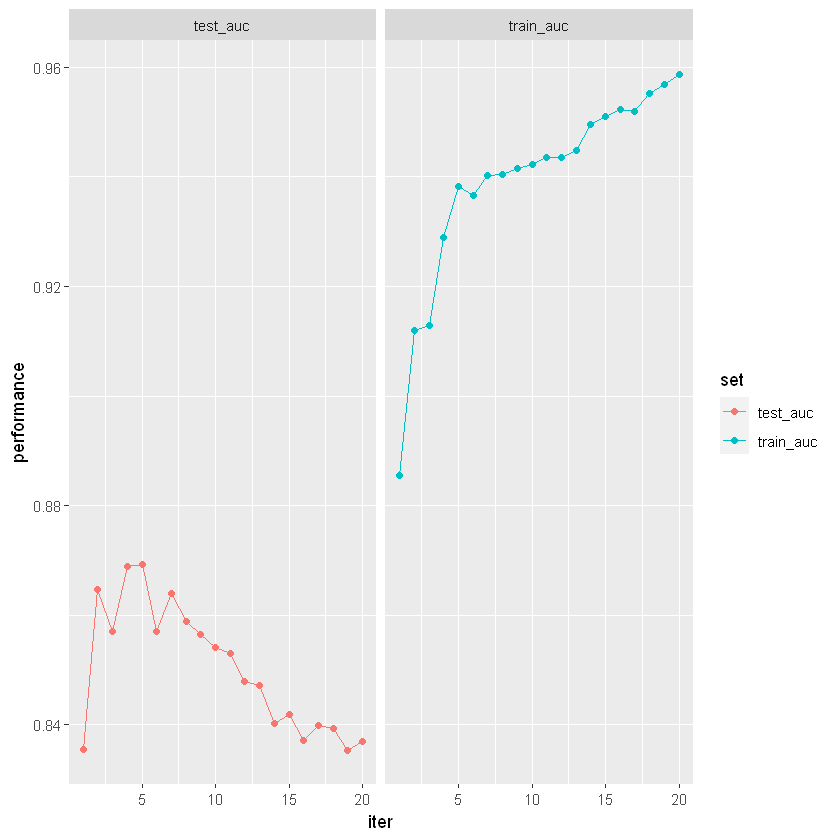

In [128]:
#plotting learning curve of the number of iterations
#Need to have watchlist and verbose turned on
watchlist <- list(train=dtrain, test=dval)
set.seed(123)
xgbModel_opt <- xgb.train(
    data = dtrain, 
    nrounds = 20,
    eta= 0.1,
    objective = "binary:logistic", 
    verbose = 2, 
    watchlist = watchlist,
    eval_metric = 'auc',
)

history <- xgbModel_opt$evaluation_log

history %>% pivot_longer(2:3, names_to = "set", values_to = "performance") %>% 
  ggplot(., aes(iter, performance, col = set))+
  geom_point()+ geom_line()+
  facet_wrap(~set)

### Validation

In [129]:
set.seed(123)
##Optimize nrounds BEST
opt_iter <- history$iter[which.max(history$test_auc)]

xgbModel_opt <- xgb.train(
    data          = dtrain, 
    nrounds       = opt_iter, 
    objective     = "binary:logistic",
    eta           = 0.1,
    verbose       = 2, 
    eval_metric   = 'auc'
)

predxgb <- predict(xgbModel_opt,dval)
auc <-AUC::auc(roc(predxgb,y_val))
AUC::auc(roc(predxgb,y_val))

[1] 0.8692645

In [130]:
res <-ifelse(predxgb>=0.5,1,0)
true_outcome <- y_val

confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 39  8
         1 18 44

[1] "AUC:  0.869264507422402"

[1] "Accuracy:  0.761467889908257"

[1] "Recall:  0.846153846153846"

[1] "Precision:  0.709677419354839"

### Test

In [133]:
set.seed(123)
##Optimize nrounds BEST
opt_iter <- history$iter[which.max(history$test_auc)]

xgbModel_opt <- xgb.train(
    data          = dtrainval, 
    nrounds       = opt_iter, 
    objective     = "binary:logistic",
    eta           = 0.1,
    verbose       = 2, 
    eval_metric   = 'auc'
)

predxgb <- predict(xgbModel_opt,dtest)
auc <-AUC::auc(roc(predxgb,y_test))
AUC::auc(roc(predxgb,y_test))

[1] 0.8175397

In [134]:
#Although a lower AUC the recall and precision i significantly better than both ranger and random forest
set.seed(123)
predxgb <- predict(xgbModel_opt,dtest)
auc <-AUC::auc(roc(predxgb,y_test))
res <-ifelse(predxgb>=0.5,1,0)
true_outcome <- y_test


confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 54 14
         1 30 61

[1] "AUC:  0.817539682539683"

[1] "Accuracy:  0.723270440251572"

[1] "Recall:  0.813333333333333"

[1] "Precision:  0.67032967032967"

## LightGBM

In [34]:
#Preparing the train and validation tables
table_train5 <- table_train
table_val5 <- table_val
table_test5 <- table_test
table_trainval5 <- table_trainval

table_train5$Top10 <- NULL
table_train5$Top4 <- NULL
table_train5$Top3 <- NULL
table_train5$Top2 <- NULL

table_val5$Top10 <- NULL
table_val5$Top4 <- NULL
table_val5$Top3 <- NULL
table_val5$Top2 <- NULL

table_test5$Top10 <- NULL
table_test5$Top4 <- NULL
table_test5$Top3 <- NULL
table_test5$Top2 <- NULL

table_trainval5$Top10 <- NULL
table_trainval5$Top4 <- NULL
table_trainval5$Top3 <- NULL
table_trainval5$Top2 <- NULL

In [35]:
#new train en val set
y_train <- table_train5$Top5
train <- table_train5
train$Top5<- NULL

y_val <- table_val5$Top5
val <- table_val5
val$Top5 <-NULL

y_test <- table_test5$Top5
test <- table_test
table_test5$Top5 <- NULL

#Combining test and validationset together
y_trainval <- table_trainval5$Top5
trainval <- table_trainval5
trainval$Top5<- NULL

In [36]:
train_fs <- train[varsel_boruta]
val_fs <- val[varsel_boruta]
test_fs <- test[varsel_boruta]
trainval_fs = trainval[varsel_boruta]

### Tuning

In [ ]:
leaves <- c(2, 4, 6, 8)
nround <- c(2, 5, 10, 20, 50, 100, 200)
learning_rate <- c(0.01, 0.05, 0.1, 0.2, 0.5)

# create data frame of all possible combinations
params <- expand.grid(leaves, nround, learning_rate)
colnames(params) <- c("leaves", "nround", "learning_rate")

aucs <- vector()
for (row in 1:nrow(params)) {
  # set parameters
  par <- params[row, ]
  param_set <- list(num_leaves = par[, "leaves"],
                    learning_rate = par[,"learning_rate"],
                    objective = "binary", boosting = "gbdt",
                    num_iterations = par[, "nround"])
  # model
  lgbm_model <- lightgbm(data = as.matrix(train_fs),
                         params = param_set, label = as.numeric(as.character(y_train)),
                         verbose = -1)

  # predict
  pred <- predict(lgbm_model, as.matrix(val_fs))
  
  # evaluate
  aucs[row] <- AUC::auc(AUC::roc(pred, y_val))
}

In [ ]:
(optimal_paramsLGBM <- params[which.max(aucs), ])

### Build optimal model

In [ ]:
# Build the final model on the optimal parameters
final_param_set <- list(num_leaves = optimal_paramsLGBM[, "leaves"],
                        learning_rate = optimal_paramsLGBM[, "learning_rate"], objective = "binary",
                        boosting = "gbdt", num_iterations = optimal_paramsLGBM[,
                                                                               "nround"])

lgbm_model <- lightgbm(data = as.matrix(train_fs), params = final_param_set,
                       label = as.numeric(as.character(y_train)), verbose = -1)

### Validation

In [ ]:
# Predict
predlgbm <- predict(lgbm_model, as.matrix(val_fs))
# Evaluate
AUC::auc(AUC::roc(predlgbm, y_val))

### Test

In [ ]:
predlgbm <- predict(lgbm_model, as.matrix(test_fs))
auc <-AUC::auc(AUC::roc(predlgbm, y_test))

In [ ]:
res <-ifelse(predlgbm>=0.5,1,0)
true_outcome <- y_test


confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)



# Rotation forest


In [153]:
set.seed(123)
train <- basetable_train
yTRAIN <- train$Top5
train$Top10 = NULL
train$Top5 = NULL
train$Top4 = NULL
train$Top3 = NULL
train$Top2 = NULL

val <- basetable_val
yVAL <- val$Top5
val$Top10 = NULL
val$Top5 = NULL
val$Top4 = NULL
val$Top3 = NULL
val$Top2 = NULL

In [136]:
#Boruto performs better
train = train[varsel_boruta]
val = val[varsel_boruta]

### Tuning

In [139]:
# hyperparameter grid search
hyper_grid <- expand.grid(
  L       = seq(1, 20, by = 1),
  K       = seq(1, 3, by = 1)
)

In [140]:
ncol(train)

[1] 6

In [141]:
for(i in 1:nrow(hyper_grid)) {
  set.seed(123)
  # train model
  RoFmodel <- rotationForest(
    x               = train, 
    y               = yTRAIN, 
    L               = hyper_grid$L[i],
    K               = hyper_grid$K[i],
  )
  predictions =  predict(RoFmodel, val)
  auc = AUC::auc(roc(predictions,factor(yVAL)))
  hyper_grid$AUC[i] <- auc
}

In [142]:
hyper_grid %>% 
  dplyr::arrange(AUC) %>%
  tail(5)


,L,K,AUC
56,19,3,0.8884953
57,20,3,0.8911943
58,16,3,0.8911943
59,6,3,0.8920378
60,7,3,0.8964238


### Validation

In [155]:
#No tuning
set.seed(123)
RoFmodel <- rotationForest(x=train, y = yTRAIN)
predictions =  predict(RoFmodel,val)
AUC::auc(roc(predictions,factor(yVAL)))

[1] 0.8829285

In [144]:
#With tuning
set.seed(123)
RoFmodel <- rotationForest(x=train, y = yTRAIN, L=7, K=3)
predictions =  predict(RoFmodel, val)
auc = AUC::auc(roc(predictions,factor(yVAL)))
AUC::auc(roc(predictions,factor(yVAL)))

[1] 0.8964238

In [145]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yVAL

In [146]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 43  7
         1 14 45

[1] "AUC:  0.89642375168691"

[1] "Accuracy:  0.807339449541284"

[1] "Recall:  0.865384615384615"

[1] "Precision:  0.76271186440678"

### Test

In [156]:
set.seed(123)
train <- basetable
yTRAIN <- train$Top5
train$Top10 = NULL
train$Top5 = NULL
train$Top4 = NULL
train$Top3 = NULL
train$Top2 = NULL

test <- basetable_test
yTEST <- test$Top5
test$Top10 = NULL
test$Top5 = NULL
test$Top4 = NULL
test$Top3 = NULL
test$Top2 = NULL

In [157]:
train = train[varsel_boruta]
test = test[varsel_boruta]

In [158]:
set.seed(123)
model <- rotationForest(x=train, y = yTRAIN, L=7, K=3)
predictions =  predict(model,test)
auc = AUC::auc(roc(predictions,factor(yTEST)))
AUC::auc(roc(predictions,factor(yTEST)))

[1] 0.8376984

In [150]:
res = ifelse(predictions>=0.5,1,0)
true_outcome = yTEST

In [151]:
confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

paste("AUC: ", auc)
paste("Accuracy: ", accuracy)
paste("Recall: ", recall)
paste("Precision: ", precision)

          Reference
Prediction  0  1
         0 56 14
         1 28 61

[1] "AUC:  0.837698412698413"

[1] "Accuracy:  0.735849056603774"

[1] "Recall:  0.813333333333333"

[1] "Precision:  0.685393258426966"

Best performing model in terms of recall

# Catboost

In [159]:
train_pool <- catboost.load_pool(data = data.matrix(basetable_train[,-(40:44)]),label = as.numeric(as.character(basetable_train$Top5)))
val_pool <- catboost.load_pool(data = data.matrix(basetable_val[,-(40:44)]), label = as.numeric(as.character(basetable_val$Top5)))

ERROR: Error in catboost.load_pool(data = data.matrix(basetable_train[, -(40:44)]), : could not find function "catboost.load_pool"


In [ ]:
# parameter tuning with caret
fit_control <- trainControl(method = "cv",
                            number = 4,
                            classProbs = TRUE)

grid <- expand.grid(depth = c(4, 6, 8),
                    learning_rate = c(0.1,0.5,1),
                    iterations = 100,
                    l2_leaf_reg = c(0.001, 0.01, 0.1, 1),
                    rsm = 0.95,
                    border_count = 64)
report <- train(basetable_train[,-(40:44)], as.factor(make.names(basetable_train$Top5)),
                method = catboost.caret,
                logging_level = 'Verbose', preProc = NULL,
                tuneGrid = grid, trControl = fit_control)

print(report)
#extract best parameters
params <- list(loss_function = 'Logloss',
               iterations = 100, 
               depth = 8, 
               learning_rate = 0.1,
               l2_leaf_reg = 0.001, #L2 regularization 
               metric_period=10)

importance <- varImp(report, scale = FALSE)
print(importance)

In [ ]:
# train model
catboost_train <- catboost.train(train_pool,  NULL, params = params)

preds_cad_train <- catboost.predict(catboost_train, val_pool)

AUC::auc(AUC::roc(preds_cad_train,basetable_val$Top5)) # Validation set AUC

In [ ]:
# now for test set
big_pool <- catboost.load_pool(data = data.matrix(basetable[,-(40:44)]), 
                                 label = as.numeric(as.character(basetable$Top5)))
test_pool <- catboost.load_pool(data = data.matrix(basetable_test[,-(40:44)]), 
                               label = as.numeric(as.character(basetable_test$Top5)))

catboost_test <- catboost.train(big_pool,  NULL, params = params)

preds_cad_test <- catboost.predict(catboost_test, test_pool)

AUC::auc(AUC::roc(preds_cad_test,basetable_test$Top5)) # Test set AUC

In [ ]:
# check accuracy
res <-ifelse(preds_cad_test>=0.5,1,0)
true_outcome <- basetable_test$Top5


confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)
accuracy

# Heterogenous ensemble

In [ ]:

# adaboost & rotation
finalpredictions <- (auc_RoF/(auc_RoF + auc_ada)) * pred_RoF_test + (auc_ada/(auc_RoF + auc_ada)) * predAB

AUC::auc(AUC::roc(finalpredictions, basetable_test$Top5))

# accuracy
res <-ifelse(finalpredictions>=0.5,1,0)
true_outcome <- basetable_test$Top5


confusionMatrix(as.factor(res), as.factor(true_outcome))[[2]]
TN =(confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,1]
TP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,2]
FN = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][1,2]
FP = (confusionMatrix(as.factor(res), as.factor(true_outcome)))[[2]][2,1]

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)
accuracy
